# Top quark analyse

In [ ]:
import sys
#!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install uproot3 pandas numpy matplotlib

In [1]:
import uproot3 # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
from itertools import combinations 
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import AutoMinorLocator # for minor ticks
from datetime import date
from scipy.optimize import curve_fit

BIGGER_SIZE = 16
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]
#plt.style.use('default')

import infofile # local file containing cross-sections, sums of weights, dataset IDs

In [12]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

#fraction = 0.01 # reduce this is you want the code to run quicker
fraction = 0.1 # reduce this is you want the code to run quicker
                                                                                                                                  
#tuple_path = r'C:\Users\jacob\Desktop\1lep/' # local
tuple_path = '../data/'
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/" # web address

MV2c10_cut = 0.8244
GeV_cut = 30*1000
ALL = slice(None) # trick til at give en query der giver alle rækker
W_boson = 80.385
fig_ver = '_'+date.today().strftime("%d%m%Y")+'.png'

In [3]:
samples = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D'],
    },

    r'V+jets' : { # V+jets
        'list' : [

# ls | grep "36110[6-8]" | grep Z
'Zee'
,'Zmumu'
,'Ztautau'

# ls | grep "36110[0-5]" | grep W
,'Wplusenu'
,'Wplusmunu'
,'Wplustaunu'
,'Wminusenu'
,'Wminusmunu'
,'Wminustaunu'

# ls | grep "3641[0-9][0-9]" | grep W      
,'Wmunu_PTV0_70_CVetoBVeto'
,'Wmunu_PTV0_70_CFilterBVeto'
,'Wmunu_PTV0_70_BFilter'
,'Wmunu_PTV70_140_CVetoBVeto'
,'Wmunu_PTV70_140_CFilterBVeto'
,'Wmunu_PTV70_140_BFilter'
,'Wmunu_PTV140_280_CVetoBVeto'
,'Wmunu_PTV140_280_CFilterBVeto'
,'Wmunu_PTV140_280_BFilter'
,'Wmunu_PTV280_500_CVetoBVeto'
,'Wmunu_PTV280_500_CFilterBVeto'
,'Wmunu_PTV280_500_BFilter'
,'Wmunu_PTV500_1000'
,'Wmunu_PTV1000_E_CMS'
,'Wenu_PTV0_70_CVetoBVeto'
,'Wenu_PTV0_70_CFilterBVeto'
,'Wenu_PTV0_70_BFilter'
,'Wenu_PTV70_140_CVetoBVeto'
,'Wenu_PTV70_140_CFilterBVeto'
,'Wenu_PTV70_140_BFilter'
,'Wenu_PTV140_280_CVetoBVeto'
,'Wenu_PTV140_280_CFilterBVeto'
,'Wenu_PTV140_280_BFilter'
,'Wenu_PTV280_500_CVetoBVeto'
,'Wenu_PTV280_500_CFilterBVeto'
,'Wenu_PTV280_500_BFilter'
,'Wenu_PTV500_1000'
,'Wenu_PTV1000_E_CMS'
,'Wtaunu_PTV0_70_CVetoBVeto'
,'Wtaunu_PTV0_70_CFilterBVeto'
,'Wtaunu_PTV0_70_BFilter'
,'Wtaunu_PTV70_140_CVetoBVeto'
,'Wtaunu_PTV70_140_CFilterBVeto'
,'Wtaunu_PTV70_140_BFilter'
,'Wtaunu_PTV140_280_CVetoBVeto'
,'Wtaunu_PTV140_280_CFilterBVeto'
,'Wtaunu_PTV140_280_BFilter'
,'Wtaunu_PTV280_500_CVetoBVeto'
,'Wtaunu_PTV280_500_CFilterBVeto'
,'Wtaunu_PTV280_500_BFilter'
,'Wtaunu_PTV500_1000'
,'Wtaunu_PTV1000_E_CMS'

# ls | grep "3641[0-9][0-9]" | grep Z
,'Zmumu_PTV0_70_CVetoBVeto'
,'Zmumu_PTV0_70_CFilterBVeto'
,'Zmumu_PTV0_70_BFilter'
,'Zmumu_PTV70_140_CVetoBVeto'
,'Zmumu_PTV70_140_CFilterBVeto'
,'Zmumu_PTV70_140_BFilter'
,'Zmumu_PTV140_280_CVetoBVeto'
,'Zmumu_PTV140_280_CFilterBVeto'
,'Zmumu_PTV140_280_BFilter'
,'Zmumu_PTV280_500_CVetoBVeto'
,'Zmumu_PTV280_500_CFilterBVeto'
,'Zmumu_PTV280_500_BFilter'
,'Zmumu_PTV500_1000'
,'Zmumu_PTV1000_E_CMS'
,'Zee_PTV0_70_CVetoBVeto'
,'Zee_PTV0_70_CFilterBVeto'
,'Zee_PTV0_70_BFilter'
,'Zee_PTV70_140_CVetoBVeto'
,'Zee_PTV70_140_CFilterBVeto'
,'Zee_PTV70_140_BFilter'
,'Zee_PTV140_280_CVetoBVeto'
,'Zee_PTV140_280_CFilterBVeto'
,'Zee_PTV140_280_BFilter'
,'Zee_PTV280_500_CVetoBVeto'
,'Zee_PTV280_500_CFilterBVeto'
,'Zee_PTV280_500_BFilter'
,'Zee_PTV500_1000'
,'Zee_PTV1000_E_CMS'
,'Ztautau_PTV0_70_CVetoBVeto'
,'Ztautau_PTV0_70_CFilterBVeto'
,'Ztautau_PTV0_70_BFilter'
,'Ztautau_PTV70_140_CVetoBVeto'
,'Ztautau_PTV70_140_CFilterBVeto'
,'Ztautau_PTV70_140_BFilter'
,'Ztautau_PTV140_280_CVetoBVeto'
,'Ztautau_PTV140_280_CFilterBVeto'
,'Ztautau_PTV140_280_BFilter'
,'Ztautau_PTV280_500_CVetoBVeto'
,'Ztautau_PTV280_500_CFilterBVeto'
,'Ztautau_PTV280_500_BFilter'
,'Ztautau_PTV500_1000'
,'Ztautau_PTV1000_E_CMS'
        ],
        'color' : "#ff0000" # red
    },

    r'Single top' : { # Single top
        'list' : [
# ls | grep "410011\|410012\|410013\|410014\|410025\|410026"
'single_top_tchan'
,'single_antitop_tchan'
,'single_top_wtchan'
,'single_antitop_wtchan'
,'single_top_schan'
,'single_antitop_schan'
        ],
        'color' : "#00cdff" # light blue
    },
    
    r'Diboson' : { # Diboson
        # ls | grep "363359\|363360\|363492\|363356\|363490\|363358\|363489\|363491\|363493"
        'list' : ['ZqqZll','WqqZll','WpqqWmlv','WplvWmqq','WlvZqq','llll','lllv','llvv','lvvv'],
        'color' : "#00ff32" # green
    },

    r'$t\bar{t}$' : { # ttbar
        'list' : ['ttbar_lep'],
        'color' : "#6b59d3" # purple
    },
}



In [4]:
def get_data_from_files():
    data = {} # define empty dictionary to hold dataframes
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: # MC prefix
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".1lep.root" # file name to open
            temp = read_file(fileString,val) # call the function read_file defined below
            frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data[s] = pd.concat(frames) # dictionary entry is concatenated dataframes
    
    return data # return dictionary of dataframes

In [5]:
def calc_weight(xsec_weight, mcWeight, scaleFactor_PILEUP,
                scaleFactor_ELE, scaleFactor_MUON, 
                scaleFactor_LepTRIGGER ):
    return xsec_weight*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER

In [6]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [7]:
def calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    px_2 = jet_pt[2]*math.cos(jet_phi[2]) # x-component of lep[2] momentum
    py_2 = jet_pt[2]*math.sin(jet_phi[2]) # y-component of lep[2] momentum
    pz_2 = jet_pt[2]*math.sinh(jet_eta[2]) # z-component of lep[3] momentum
    sumpx = px_0 + px_1 + px_2 # x-component of 4-jets
    sumpy = py_0 + py_1 + py_2 # y-component of 4 jets
    sumpz = pz_0 + pz_1 + pz_2 # z-component of 4 jets
    sumE = jet_E[0] + jet_E[1] + jet_E[2] # energy of 4 jets
    jjj_pt = (px_0+px_1+px_2)**2+(py_0+py_1+py_2)**2
    jjj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jjj_pt, jjj_m

def calc_mjj(jet_pt,jet_eta,jet_phi,jet_E):
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    sumpx = px_0 + px_1# x-component of 2 jets
    sumpy = py_0 + py_1# y-component of 2 jets
    sumpz = pz_0 + pz_1# z-component of 2 jets
    sumE = jet_E[0] + jet_E[1]# energy of 2 jets
    jj_m = math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV
    return jj_m

In [8]:
#tjekker om der kun er én b-tagget i en kombination
def en_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > MV2c10_cut, data))
    return len(filtered) == 1

def to_ikke_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > MV2c10_cut, data))
    return len(filtered) == 0

def mjjj_bedste(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    try:
        samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        comb = combinations(samlet, 3) # laver alle kombinationer
        en_btagget_comb = list(filter(en_btag_tjek, comb)) # laver liste med rigtige komb. liste med tre tupler
        liste_pt_m = []
        for jets in en_btagget_comb:
            z = list(zip(*jets))  # laver fem lister med tre værdier i hver liste
            pt, m = calc_mjjj(z[1],z[2],z[3],z[4])
            liste_pt_m.append((pt,m))
        liste_pt, liste_m = list(zip(*liste_pt_m))
        bedste = np.argmax(liste_pt) # hvilket index i listen har højest værdi    
        mjjj = liste_m[bedste]
        mW_zipped = list(zip(*[j for j in en_btagget_comb[bedste] if j[0] <= MV2c10_cut]))
        mW = calc_mjj(mW_zipped[1],mW_zipped[2],mW_zipped[3],mW_zipped[4])
        return mjjj, mW # slår op og får værdien
    except ValueError:
        return 0,0

def W_m(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    try:
        samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
        comb = combinations(samlet, 2) # laver alle kombinationer
        to_btagget_comb = list(filter(to_ikke_btag_tjek, comb)) # laver liste med rigtige komb. liste med tre tupler
        liste_m = []
        for jets in to_btagget_comb:
            z = list(zip(*jets))
            m = calc_mjj(z[1],z[2],z[3],z[4])
            liste_m.append(m)
        m_diff = [abs(i-W_boson) for i in liste_m]
        bedste = np.argmin(m_diff) # hvilket index i listen har højest værdi
        mW = liste_m[bedste]
        
        W_comb = [ [[jet_MV2c10[i],jet_pt[i],jet_eta[i],jet_phi[i],jet_E[i]]] + list(to_btagget_comb[bedste]) for i,v in enumerate(jet_MV2c10) if v > MV2c10_cut ]
        
        mjjj_pt = []
        mjjj_m = []
        for i in W_comb:
            a,b,c,d,e = list(zip(*i))
            x,y = calc_mjjj(b,c,d,e)
            mjjj_pt.append(x)
            mjjj_m.append(y)
        
        return mjjj_m[np.argmax(mjjj_pt)], mW
    except ValueError:
        return 0,0

In [9]:
def cut_lep_pt(lep_pt):
    return lep_pt < GeV_cut

def cut_jet_n(jet_n):
    return jet_n < 4

def jet_pt_30GeV(jet_pt):
    # the jet pt is sorted by largest
    return jet_pt[3] > GeV_cut

def jet_pt_sum(jet_pt):
    return sum(jet_pt)

def b_tag_70(jet_MV2c10):
    return len([num for num in jet_MV2c10 if num > MV2c10_cut]) > 1

def MT_W(lep_pt, lep_phi, met_et, met_phi):
    return np.sqrt(2*lep_pt*met_et*(1-np.cos(lep_phi-met_phi)))

Cuts som kræver 1 lep
Samt 4 jets hvor 2 af jets har 70% sikkerhed

find invariant masse for 3 jets sammnenlagt. (der er 2 forskellige sammensætninger grundet 2 b jets.) 

In [10]:
def read_file(path,sample):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot3.open(path)["mini"] # open the tree called mini
    numevents = uproot3.numentries(path, "mini") # number of events
    
    # variables to calculate Monte Carlo weight
    if 'data' not in sample: xsec_weight = get_xsec_weight(sample) # get cross-section weight

    root_variables = ['lep_pt','lep_phi'
                  ,'met_et','met_phi'
                  ,'jet_n','jet_pt','jet_eta','jet_phi','jet_E','jet_MV2c10'
                  ,'mcWeight','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']
    
    for data in tree.iterate(root_variables, outputtype=pd.DataFrame, entrystop=numevents*fraction):    
        nIn = len(data.index) # number of events in this batch

        if 'data' not in sample: # only do this for Monte Carlo simulation files
            # multiply all Monte Carlo weights and scale factors together to give total weight
            data['totalWeight'] = np.vectorize(calc_weight)(xsec_weight,
                                                            data.mcWeight,
                                                            data.scaleFactor_PILEUP,
                                                            data.scaleFactor_ELE,
                                                            data.scaleFactor_MUON,
                                                            data.scaleFactor_LepTRIGGER)
    
        # cut jet number
        fail = data[ np.vectorize(cut_jet_n)(data.jet_n) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['jet_pt_30GeV'] = np.vectorize(jet_pt_30GeV)(data.jet_pt)

        # cut lep pt
        fail = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['b_tag'] = np.vectorize(b_tag_70)(data.jet_MV2c10)
    
        # Invariant mass
        _, data['mjjj'] = np.vectorize(calc_mjjj)(data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)

        data['pt_mjjj_bedste'], data['pt_mjj_comb'] = np.vectorize(mjjj_bedste)(data.jet_MV2c10,data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
        
        data['W_mjjj_bedste'], data['W_mjj_comb'] = np.vectorize(W_m)(data.jet_MV2c10,data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
        
        data['jet_pt_sum'] = np.vectorize(jet_pt_sum)(data.jet_pt)
        
        #
        data['MT_W'] = np.vectorize(MT_W)(data.lep_pt, data.lep_phi, data.met_et, data.met_phi)
        
        # Clear unused columns to save memory
        data.drop(columns=[
            'lep_pt','lep_phi','met_phi','jet_n','jet_pt','jet_eta','jet_phi','jet_E','jet_MV2c10'
            ,'mcWeight','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER'
        ], inplace=True)
        
        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
        elapsed = time.time() - start # time taken to process
        print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
      
    return data_all # return dataframe containing events passing all cuts

In [11]:
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing data samples
	Processing: data_A
		 nIn: 165414,	 nOut: 	3074	 in 5.6s
		 nIn: 165414,	 nOut: 	3108	 in 10.1s
		 nIn: 165414,	 nOut: 	3068	 in 14.6s
		 nIn: 165414,	 nOut: 	2965	 in 19.0s
		 nIn: 165414,	 nOut: 	3034	 in 23.5s
		 nIn: 152570,	 nOut: 	2682	 in 27.6s
	Processing: data_B
		 nIn: 175460,	 nOut: 	3406	 in 6.8s
		 nIn: 175460,	 nOut: 	3358	 in 12.1s
		 nIn: 175460,	 nOut: 	3264	 in 17.0s
		 nIn: 175460,	 nOut: 	3106	 in 21.7s
		 nIn: 175460,	 nOut: 	3253	 in 26.5s
		 nIn: 175460,	 nOut: 	3130	 in 31.2s
		 nIn: 175460,	 nOut: 	3090	 in 35.9s
		 nIn: 175460,	 nOut: 	3399	 in 40.8s
		 nIn: 175460,	 nOut: 	3509	 in 45.8s
		 nIn: 175460,	 nOut: 	3408	 in 50.8s
		 nIn: 175460,	 nOut: 	3508	 in 55.9s
		 nIn: 175460,	 nOut: 	3422	 in 60.8s
		 nIn: 175460,	 nOut: 	3312	 in 65.7s
		 nIn: 175460,	 nOut: 	3393	 in 70.8s
		 nIn: 175460,	 nOut: 	3305	 in 75.6s
		 nIn: 175460,	 nOut: 	3288	 in 80.4s
		 nIn: 175460,	 nOut: 	3248	 in 85.2s
		 nIn: 175460,	 nOut: 	3192	 in 89.9s
		

# ##TEST##

In [12]:
#d1 = tuple_path+'Data/data_A.1lep.root'\n",
#d1 = tuple_path+'MC/mc_364184.Wtaunu_PTV0_70_CVetoBVeto.1lep.root'
d1 = tuple_path+'Data/data_A.1lep.root'
dtest = read_file(d1, r'data')
print('done')

	Processing: data
		 nIn: 165414,	 nOut: 	3074	 in 5.1s
		 nIn: 165414,	 nOut: 	3108	 in 9.7s
		 nIn: 165414,	 nOut: 	3068	 in 14.1s
		 nIn: 165414,	 nOut: 	2965	 in 18.5s
		 nIn: 165414,	 nOut: 	3034	 in 23.0s
		 nIn: 152570,	 nOut: 	2682	 in 27.3s
done


In [13]:
dtest

,lep_pt,lep_phi,met_et,met_phi,jet_n,jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10,...,scaleFactor_LepTRIGGER,jet_pt_30GeV,b_tag,mjjj,pt_mjjj_bedste,pt_mjj_comb,W_mjjj_bedste,W_mjj_comb,jet_pt_sum,MT_W
entry,,,,,,,,,,,,,,,,,,,,,
103,[111969.61],[0.61432594],39748.914062,-0.590609,6,"[118696.42, 60372.133, 31864.127, 27943.557, 2...","[0.14715476, 0.45665833, -1.7943488, -0.157266...","[3.062986, -2.3069797, 2.15417, -2.3827689, -0...","[120380.95, 67369.62, 98638.37, 28928.11, 2543...","[-0.39944443, -0.7963451, -0.8765587, -0.57160...",...,0.0,False,True,220.445346,133.664155,81.453962,133.664155,81.453962,283839.453125,75609.867188
137,[47394.902],[1.2247137],29311.541016,-1.970879,5,"[63654.555, 59761.22, 33486.867, 22406.45, 202...","[0.87740463, 1.6152775, -0.9683505, -0.7135607...","[0.72087777, -2.2173972, -2.9363217, 1.7634941...","[90380.93, 156360.28, 50896.13, 28594.59, 5879...","[-0.8103455, 0.9210662, 0.92674536, 0.24246363...",...,0.0,False,True,243.160283,151.143851,78.841560,151.143851,78.841560,199536.283203,74517.250000
245,[53513.938],[-2.8392951],9450.745117,-1.100348,4,"[76612.43, 33650.72, 29444.754, 20502.02]","[-0.9297579, 0.83875006, 0.82860243, 1.3978581]","[1.6619253, -1.1125637, 1.0509864, -0.68988633]","[112763.875, 46739.355, 40293.11, 44196.86]","[0.7230937, -0.88048595, -0.8204317, -0.76844174]",...,0.0,False,False,183.696806,0.000000,0.000000,0.000000,0.000000,160209.921875,34362.425781
274,[141024.22],[1.1199301],12214.380859,-3.074841,4,"[125714.734, 27433.254, 24590.795, 23727.838]","[-1.1971732, -1.4551935, 0.26198015, -0.4266414]","[-2.2333255, -2.753675, 0.06673221, -0.80602634]","[227682.8, 62054.703, 25850.162, 26134.527]","[0.36249486, -0.83090496, -0.7901678, -0.5917148]",...,0.0,False,False,158.489356,0.000000,0.000000,0.000000,0.000000,201466.621094,71761.375000
304,[31771.027],[-0.7938594],17225.589844,-1.001861,4,"[48210.805, 27500.012, 25693.979, 23326.924]","[-0.76273036, 2.4953797, 1.7710013, 0.536971]","[2.8777747, 2.5501995, 0.045767356, 0.8746324]","[63390.29, 167941.67, 77893.61, 27390.354]","[-0.7281868, -0.6406239, -0.48251456, 0.37281978]",...,0.0,False,False,231.242500,0.000000,0.000000,0.000000,0.000000,124731.718750,4857.204102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979228,[37819.613],[2.05169],16929.453125,-2.809037,7,"[90246.586, 83683.7, 55125.586, 38509.277, 314...","[0.11215135, 0.033196125, -0.013400791, 0.1983...","[-2.1735914, 1.7903193, 0.8740864, -1.2516154,...","[91648.99, 85186.09, 55785.65, 39908.617, 4207...","[-0.89722776, -0.79421383, -0.90035, -0.933325...",...,0.0,True,False,224.378117,0.000000,0.000000,0.000000,0.000000,353736.748047,33034.457031
979389,[86704.2],[0.83757174],9772.345703,-0.920023,4,"[160766.62, 147154.12, 34122.79, 29190.584]","[0.9765548, -2.0100882, -0.27716216, -1.4360365]","[0.74868065, -2.6815758, -2.486327, -1.7843508]","[244276.72, 559327.9, 36295.434, 65050.08]","[-0.8267565, -0.884027, -0.9496147, -0.6988995]",...,0.0,False,False,754.611121,0.000000,0.000000,0.000000,0.000000,371234.123047,44825.425781
979446,[38769.68],[-2.2245603],75630.132812,1.641628,5,"[136699.77, 54539.484, 47341.973, 21216.953, 2...","[0.91010875, -1.0154788, 1.5227649, -0.9086076...","[-2.0310125, 0.7088694, 1.4679404, -0.33773634...","[197577.98, 85477.83, 114126.81, 30807.373, 24...","[-0.95474666, -0.94529074, -0.83497375, -0.559...",...,0.0,False,False,351.363592,0.000000,0.000000,0.000000,0.000000,280156.597656,101268.546875


# ##TEST##

In [70]:
def gauss(x,A,mu,std):
    y = (A*np.exp(-((x-mu)**2)/(2*std**2)))
    return y

def lin_fit(x, a, b):
    return a*x + b

def gauss_lin(x,A,mu,std,a,b):
    return gauss(x,A,mu,std) + lin_fit(x, a, b)

def plot_data_query(data, query, column, p_xmin = 100, p_xmax = 240, p_step_size = 5, p_xlabel = 'mjjj [GeV]', p_title = '', desc = '', cut_text = '',  div_plot = False, fit = False):

    xmin = p_xmin # GeV
    xmax = p_xmax # GeV
    step_size = p_step_size # GeV

    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    data_x,_ = np.histogram(data['data'].query(query)[column], 
                            bins=bin_edges ) # histogram the data
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    signal_x = data[r'$t\bar{t}$'].query(query)[column] # histogram the signal
    signal_weights = data[r'$t\bar{t}$'].query(query).totalWeight # get the weights of the signal events
    signal_color = samples[r'$t\bar{t}$']['color'] # get the colour for the signal bar

    mc_x = [] # define list to hold the Monte Carlo histogram entries
    mc_weights = [] # define list to hold the Monte Carlo weights
    mc_colors = [] # define list to hold the colors of the Monte Carlo bars
    mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

    for s in samples: # loop over samples
        if s not in ['data', r'$t\bar{t}$']: # if not data nor signal
            mc_x.append( data[s].query(query)[column] ) # append to the list of Monte Carlo histogram entries
            mc_weights.append( data[s].query(query).totalWeight ) # append to the list of Monte Carlo weights
            mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels

    # *************
    # Main plot 
    # *************
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data') 
    
    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )
    
    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
        
    # plot the signal bar
    mc_signal = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, 
                   weights=signal_weights, color=signal_color,
                   label=r'$t\bar{t}$')

    mc_x_err = np.sqrt( mc_x_tot+mc_signal[0] ) # statistical error on the MC bars
    
    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot+mc_signal[0]-mc_x_err, color='none',
                  hatch="////", width=step_size, label='Stat. Unc.' )

    if fit:
        #laver fit med gauss funktionen og giver den start gæt for at ramme et ordentligt fit.
        A = data_x.max()
        mu = p_xmin + p_step_size*data_x.argmax() + p_step_size/2
        sigma = 30#np.std(data_x)#30
        a = (data_x[-1]-data_x[0])/(p_xmax - p_xmin - p_step_size)
        par, cov = curve_fit(gauss_lin, bin_centres, data_x, sigma=data_x_errors, p0=[A, mu, sigma,a,data_x[0]], absolute_sigma = True)
        X = np.linspace(p_xmin, p_xmax, 100000)
        plt.plot(X, gauss_lin(X, *par), label = 'Fit', color='Orange', linewidth=3)
        
        plt.text(0.02, # x
                 0.74, # y
                 'Gauss fit', # text 
                 transform=main_axes.transAxes, # coordinate system used is that of main_axes
                 fontsize=BIGGER_SIZE)
        
        # Add a label for the analysis carried out
        plt.text(0.03, # x
                 0.70, # y
                 '$\mu$: ' + str(par[1]), # text 
                 transform=main_axes.transAxes , # coordinate system used is that of main_axes
                 fontsize=13)
        
        plt.text(0.03, # x
                 0.66, # y
                 '$\sigma$: ' + str(par[2]), # text 
                 transform=main_axes.transAxes , # coordinate system used is that of main_axes
                 fontsize=13)

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis
    
    # x-axis label
    main_axes.set_xlabel(p_xlabel, fontsize=13, x=1, horizontalalignment='right')
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                         y=1, horizontalalignment='right') 
    
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )
    
    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    plt.title(p_title)
    
    # Add text 'ATLAS Open Data' on plot
    plt.text(0.02, # x
             0.93, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.42, # x
             0.93, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes
    
    # Add a label for the analysis carried out
    plt.text(0.62, # x
             0.86, # y
             r'$\mathrm{t\bar{t}}\rightarrow \mathrm{l}\nu\mathrm{b\: q\bar{q}b}$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # Add a label for the analysis carried out
    plt.text(0.02, # x
             0.86, # y
             desc, # text 
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=BIGGER_SIZE)

    # Add a label for the analysis carried out
    plt.text(0.03, # x
             0.82, # y
             cut_text, # text 
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13)

    # draw the legend
    main_axes.legend( frameon=False ) # no box around the legend
    
    
    #
    
    if div_plot:
        plt.show()
#        plt.plot(bin_centres, data_x/(mc_x_tot+mc_signal[0]))
        plt.hlines(y = 1, xmin = p_xmin, xmax = p_xmax)
        plt.xlim(p_xmin,p_xmax)
        plt.ylim(0,2)
        
        plt.errorbar(x=bin_centres, y=data_x/(mc_x_tot+mc_signal[0]), yerr=data_x_errors/(mc_x_tot+mc_signal[0]),
                           fmt='ko', # 'k' means black and 'o' is for circles 
                           label='Data')
        
        plt.ylabel('Data / MC',
                             y=1, horizontalalignment='right')
        
        plt.xlabel(p_xlabel, fontsize=13, x=1, horizontalalignment='right')
        
        plt.legend()
        

        
    return

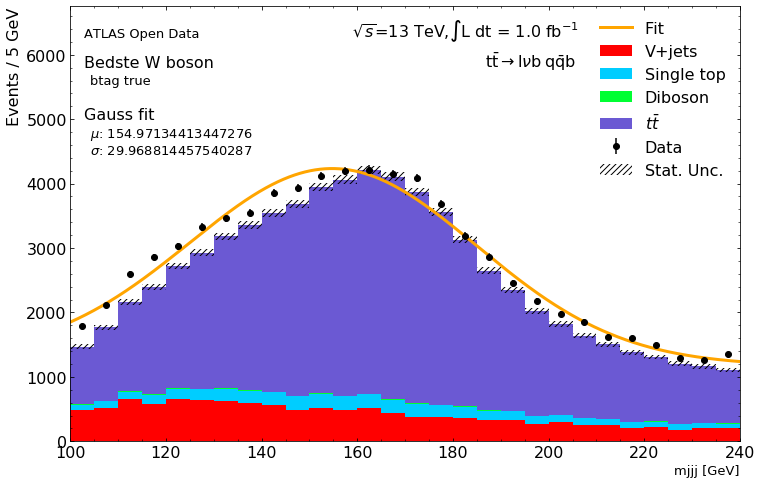

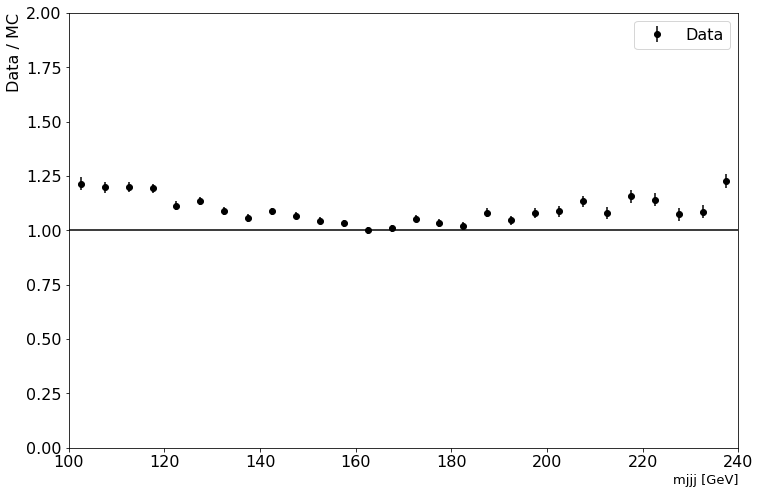

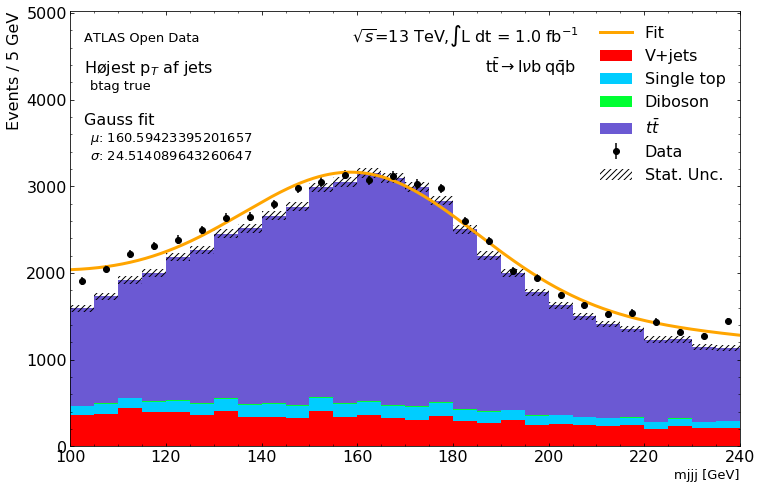

In [71]:
plot_data_query(data, 'W_mjjj_bedste != 0', 'W_mjjj_bedste', div_plot = True, fit = True, desc = 'Bedste W boson', cut_text = 'btag true')
plt.show()
plot_data_query(data, 'pt_mjjj_bedste != 0', 'pt_mjjj_bedste', div_plot = False, fit = True, desc = 'Højest p$_T$ af jets', cut_text = 'btag true')
plt.show()

In [26]:
data['data']

,met_et,jet_pt_30GeV,b_tag,mjjj,pt_mjjj_bedste,pt_mjj_comb,W_mjjj_bedste,W_mjj_comb,jet_pt_sum,MT_W
entry,,,,,,,,,,
103,39748.914062,False,True,220.445346,133.664155,81.453962,133.664155,81.453962,283839.453125,75609.867188
137,29311.541016,False,True,243.160283,151.143851,78.841560,151.143851,78.841560,199536.283203,74517.250000
245,9450.745117,False,False,183.696806,0.000000,0.000000,0.000000,0.000000,160209.921875,34362.425781
274,12214.380859,False,False,158.489356,0.000000,0.000000,0.000000,0.000000,201466.621094,71761.375000
304,17225.589844,False,False,231.242500,0.000000,0.000000,0.000000,0.000000,124731.718750,4857.204102
...,...,...,...,...,...,...,...,...,...,...
7279258,11456.526367,False,False,382.119179,0.000000,0.000000,0.000000,0.000000,171680.869141,25067.685547
7279345,62673.550781,False,False,403.328054,0.000000,0.000000,0.000000,0.000000,221278.378906,74294.218750
7279597,60813.011719,False,False,139.786675,0.000000,0.000000,0.000000,0.000000,144160.099609,73000.460938


# Rækkefølge af cuts til at plotte

In [15]:
#all_cuts = 'pt_mjjj_bedste != 0 & b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut'
all_cuts = 'b_tag == True & jet_pt_30GeV == True & met_et > @GeV_cut & MT_W > @GeV_cut'
all_cuts_text = 'At least two b-tagged jets & jet p$_T$, $E_{T}^{miss}$, $M_T^W$ > 30GeV'
btag_cut = 'At least two b-tagged jets'

### Skalarsum af pt

* all

* hvert enkelt cut

* alle cuts

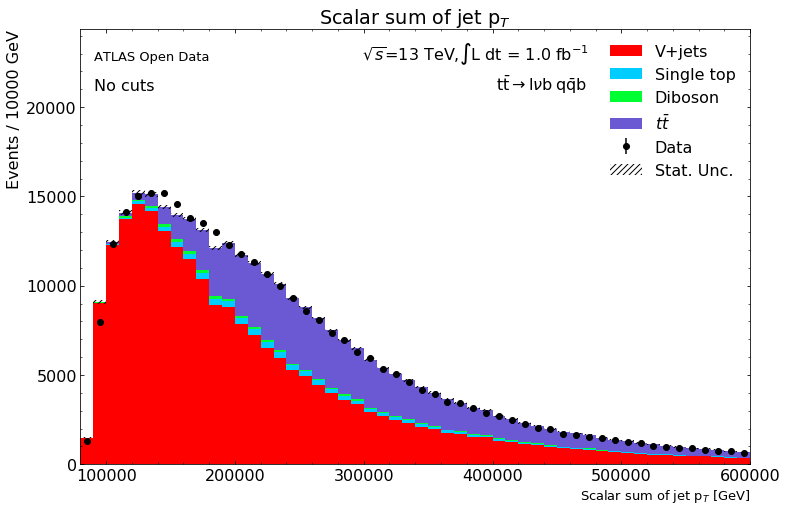

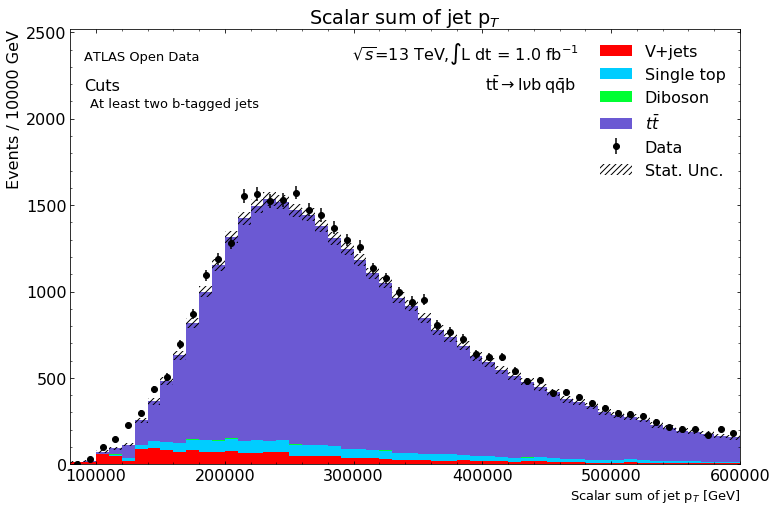

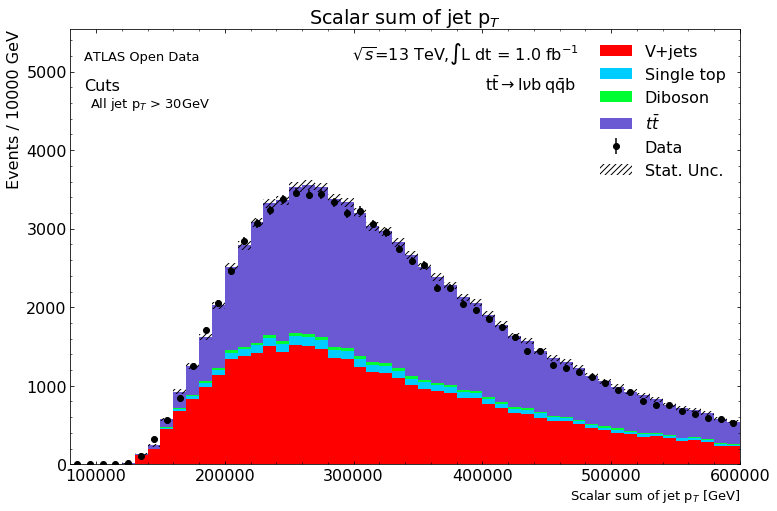

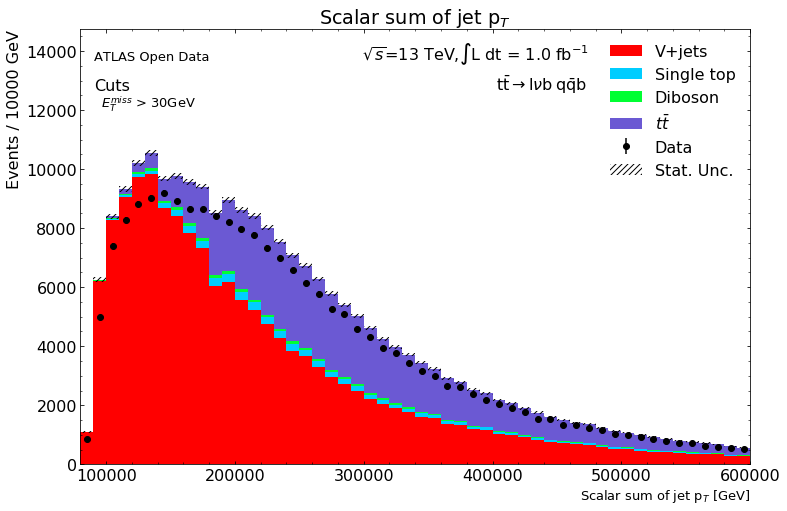

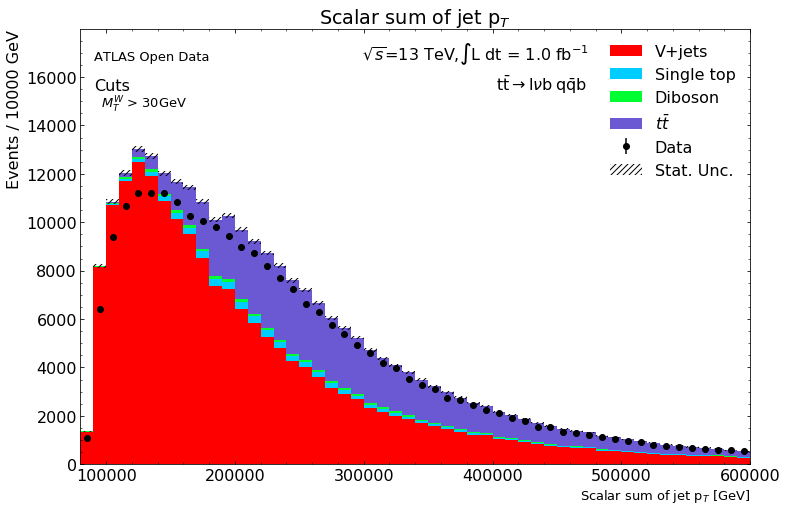

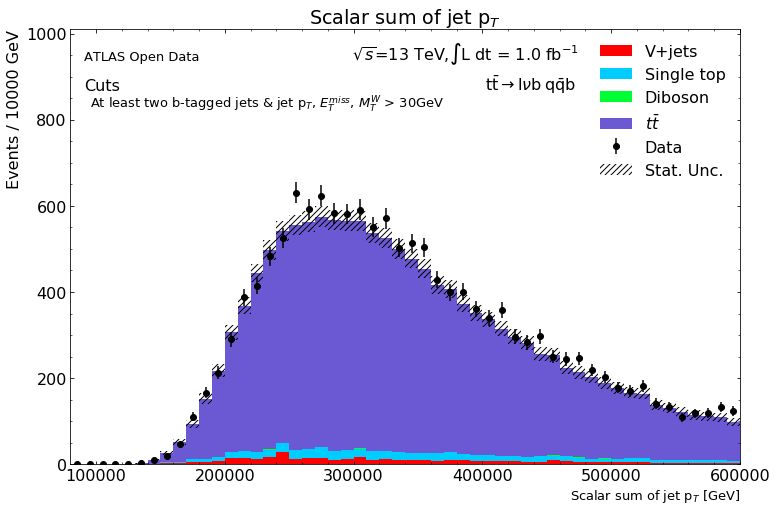

In [72]:
descr = 'Cuts'
title = 'Scalar sum of jet p$_T$'
xlabel = 'Scalar sum of jet p$_T$ [GeV]'
plot_data_query(data, '@ALL', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = 'No cuts', p_title = title)
plt.savefig('pt_sum'+fig_ver)
plt.show()
plot_data_query(data, 'b_tag == True', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = descr, p_title = title, cut_text = 'At least two b-tagged jets')
plt.savefig('pt_sum_btrue'+fig_ver)
plt.show()
plot_data_query(data, 'jet_pt_30GeV == True', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = descr, p_title = title, cut_text = 'All jet p$_T$ > 30GeV')
plt.savefig('pt_sum_jetpt'+fig_ver)
plt.show()
plot_data_query(data, 'met_et > @GeV_cut', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = descr, p_title = title, cut_text = '$E_{T}^{miss}$ > 30GeV')
plt.savefig('pt_sum_metet'+fig_ver)
plt.show()
plot_data_query(data, 'MT_W > @GeV_cut', 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = descr, p_title = title, cut_text = '$M_T^W$ > 30GeV')
plt.savefig('pt_sum_MTW'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'jet_pt_sum', p_xmin = 80000, p_xmax = 600000, p_step_size = 10000, p_xlabel = xlabel, desc = descr, p_title = title, cut_text = all_cuts_text)
plt.savefig('pt_sum_all_cuts'+fig_ver)

## W-masserne

### Highest top-quark p$_T$ combination

* btag

* alle cuts

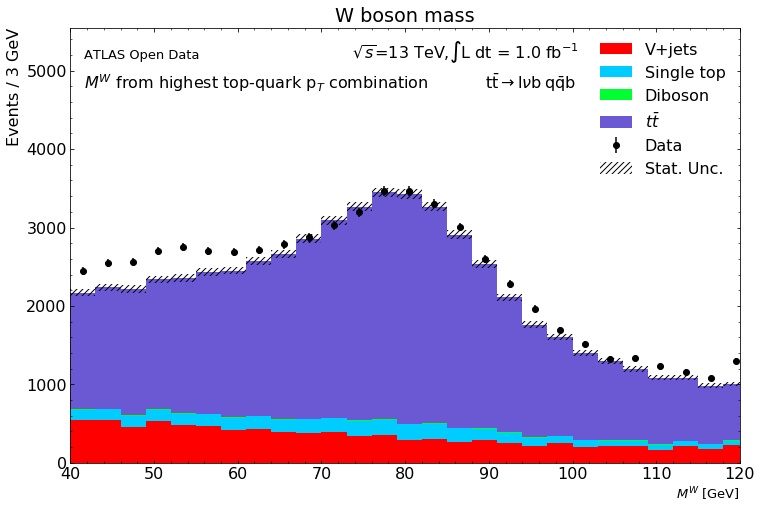

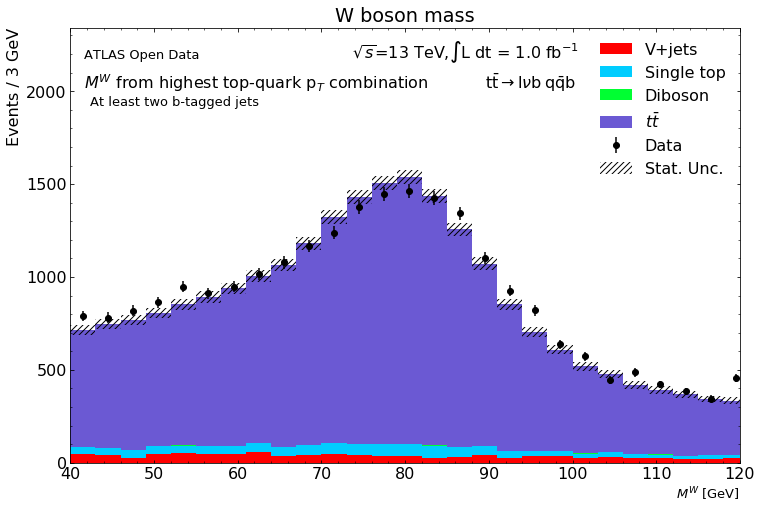

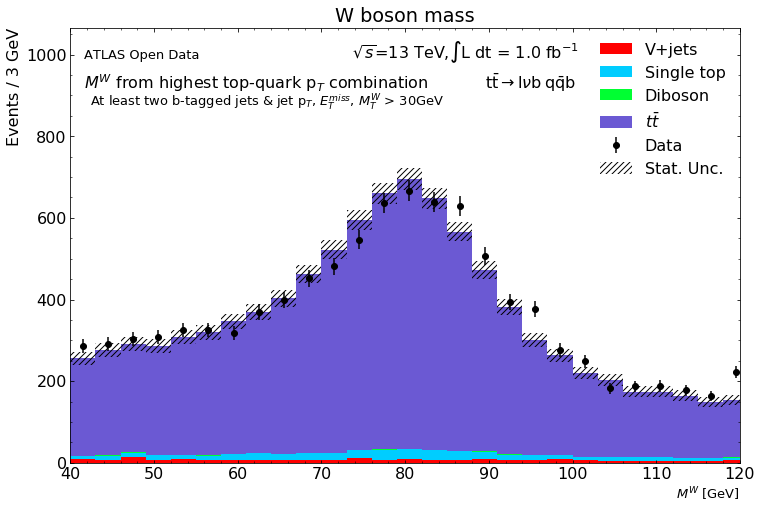

In [73]:
descr = '$M^W$ from highest top-quark p$_T$ combination'
title = 'W boson mass'
xlabel = '$M^W$ [GeV]'
step_size = 3
xmin = 40
xmax = 120
plot_data_query(data, '@ALL', 'pt_mjj_comb', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, p_title = title)
plt.savefig('W_mass_pt'+fig_ver)
plt.show()
plot_data_query(data, 'b_tag == True', 'pt_mjj_comb', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = btag_cut, p_title = title)
plt.savefig('W_mass_pt_btag'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'pt_mjj_comb', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title)
plt.savefig('W_mass_pt_all_cuts'+fig_ver)
plt.show()

### Bedste $M^W$ jets

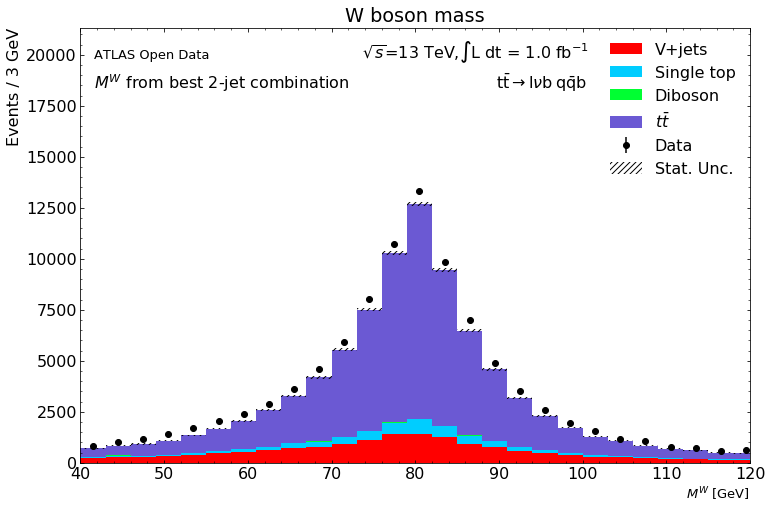

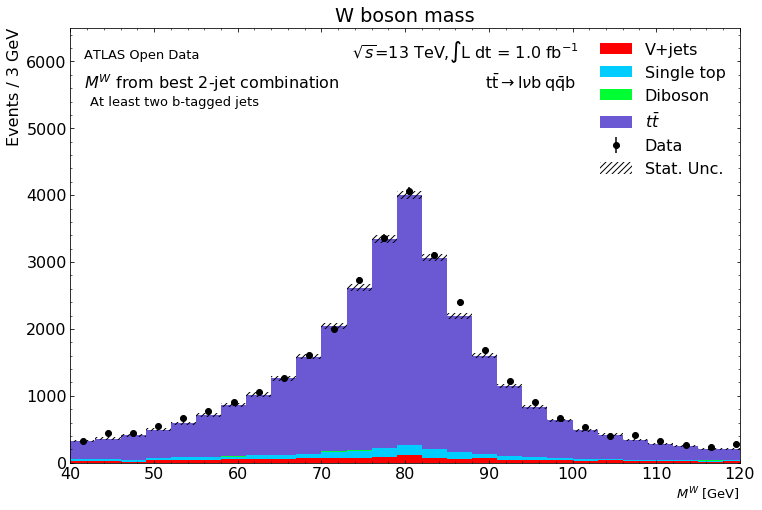

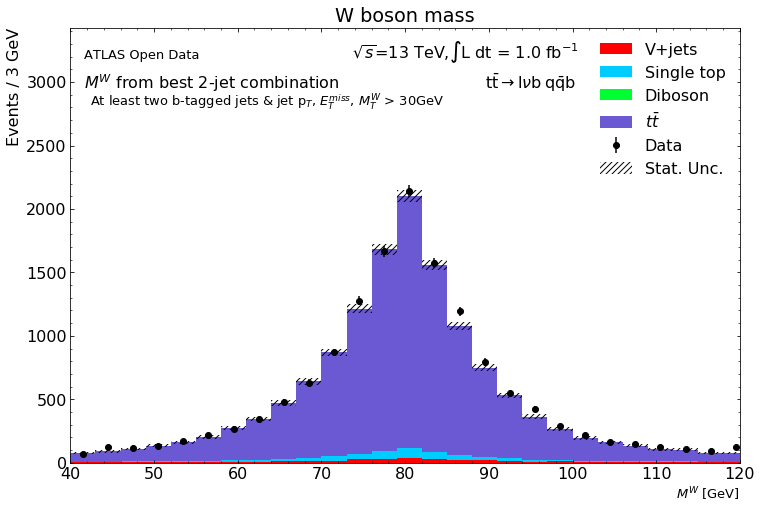

In [74]:
descr = '$M^W$ from best 2-jet combination'
title = 'W boson mass'
xlabel = '$M^W$ [GeV]'
plot_data_query(data, '@ALL', 'W_mjj_comb', p_xmin = 40, p_xmax = 120, p_step_size = 3, p_xlabel = xlabel, desc = descr, p_title = title)
plt.savefig('W_mass_W'+fig_ver)
plt.show()
plot_data_query(data, 'b_tag == True', 'W_mjj_comb', p_xmin = 40, p_xmax = 120, p_step_size = 3, p_xlabel = xlabel, desc = descr, cut_text = btag_cut, p_title = title)
plt.savefig('W_mass_W_btag'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'W_mjj_comb', p_xmin = 40, p_xmax = 120, p_step_size = 3, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title)
plt.savefig('W_mass_W_all_cuts'+fig_ver)
plt.show()

## Top-kvark

### Highest top-quark p$_T$ combination

* "tre bedste"

* btag

* alle cuts

* alle cuts, fit og data/pred

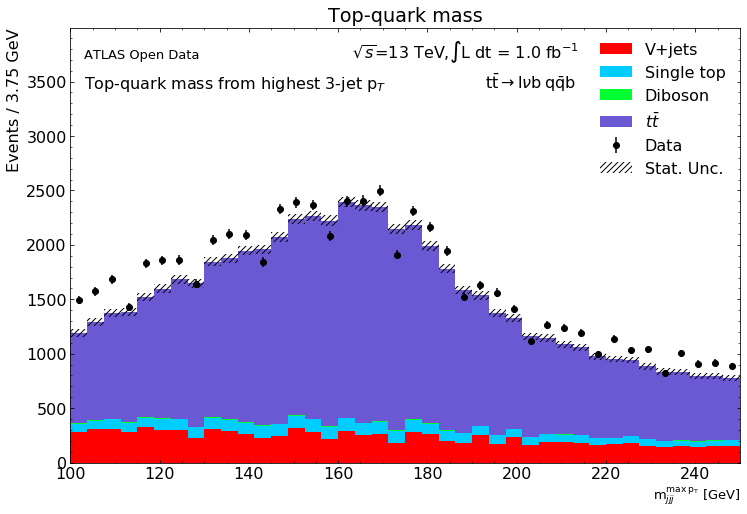

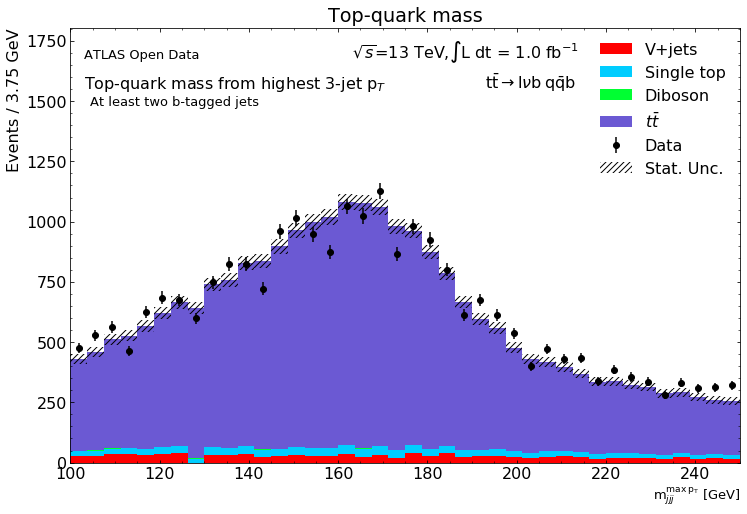

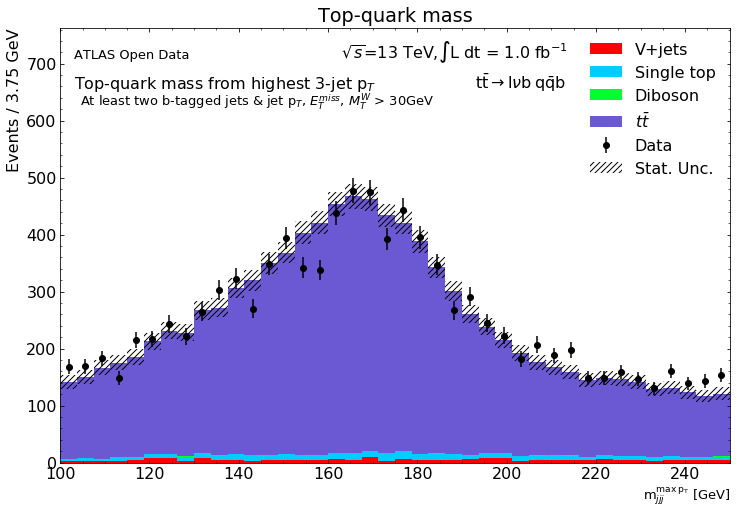

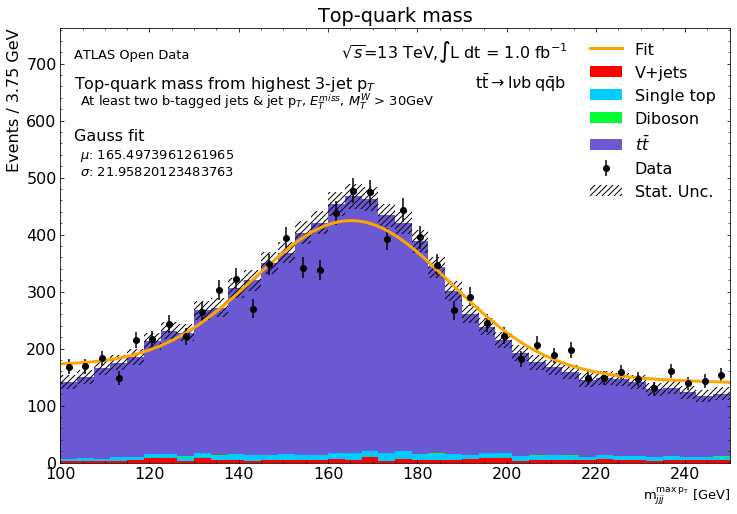

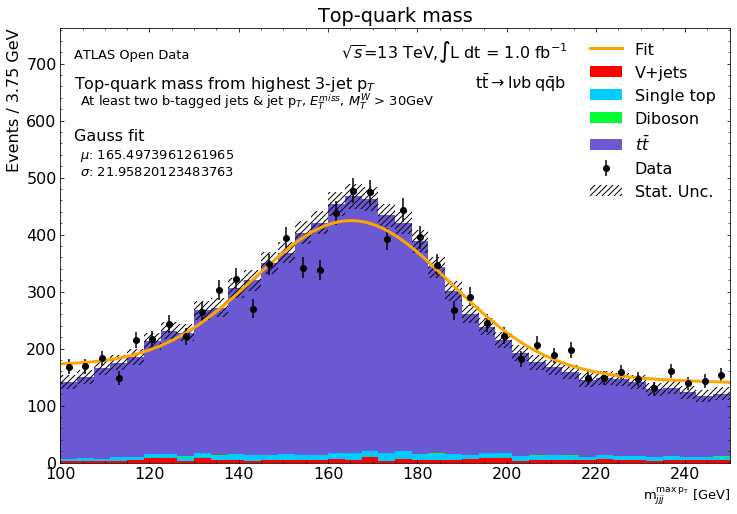

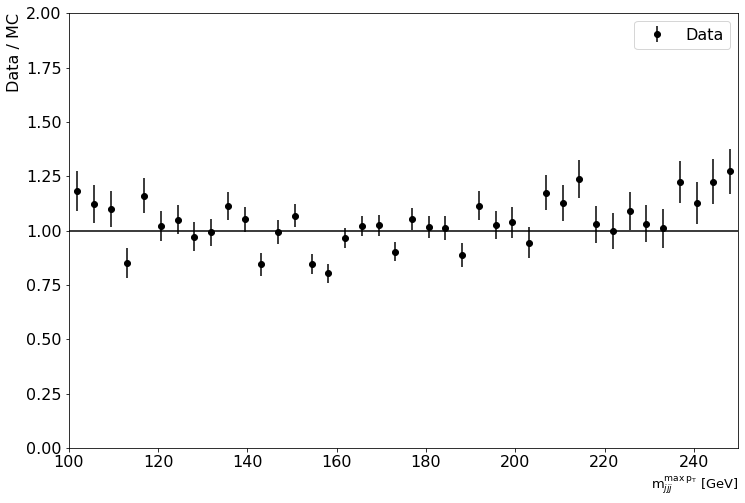

In [75]:
descr = 'Top-quark mass from highest 3-jet p$_T$'
title = 'Top-quark mass'
xlabel = 'm$_{jjj}^{\mathrm{max\:p_{T}}}$ [GeV]'
step_size = 3.75
xmin = 100
xmax = 250
plot_data_query(data, '@ALL', 'pt_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, p_title = title)
plt.savefig('tquark_pt'+fig_ver)
plt.show()
plot_data_query(data, 'b_tag == True', 'pt_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = btag_cut, p_title = title)
plt.savefig('tquark_pt_btag'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'pt_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title)
plt.savefig('tquark_pt_all_cuts'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'pt_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title, fit=True)
plt.savefig('tquark_pt_all_cuts_fit'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'pt_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title, fit=True, div_plot = True)
plt.savefig('tquark_pt_all_cuts_div'+fig_ver)
plt.show()

### Bedste $M^W$ jets

* "tre bedste"

* btag

* alle cuts

* alle cuts, fit og data/pred

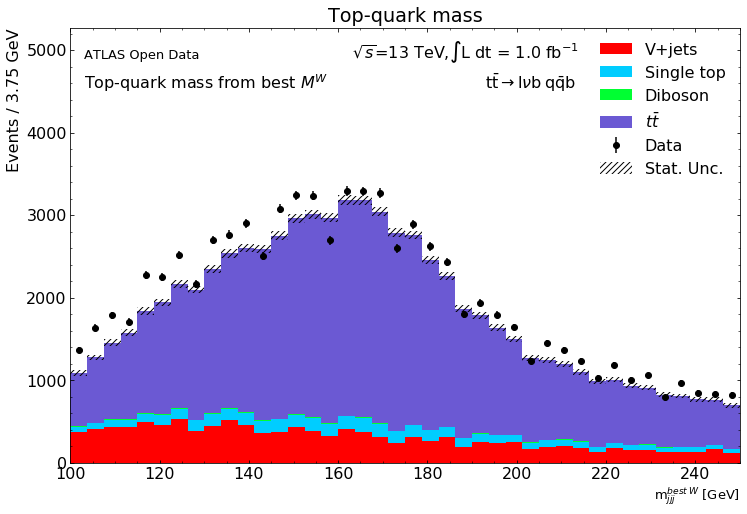

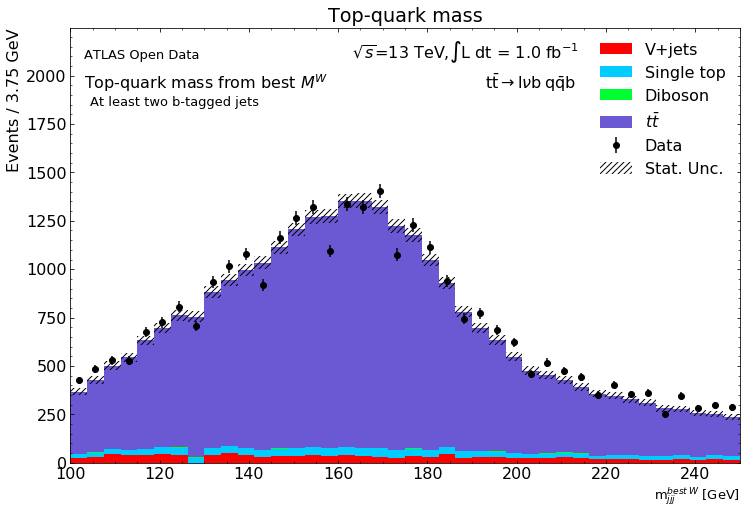

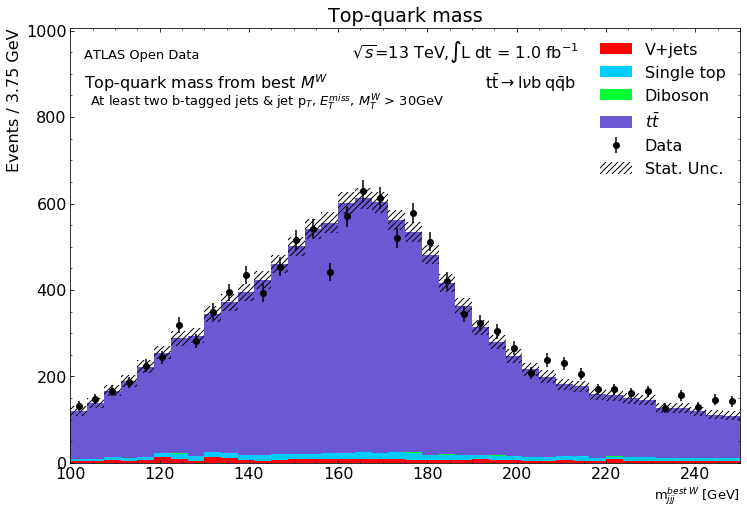

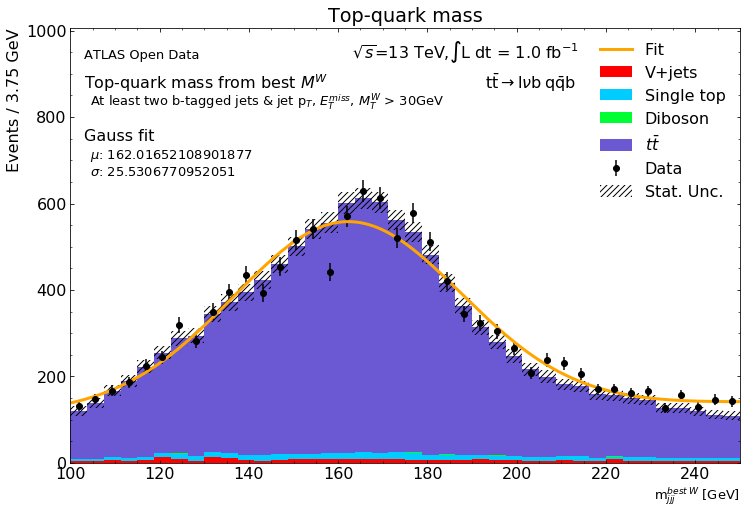

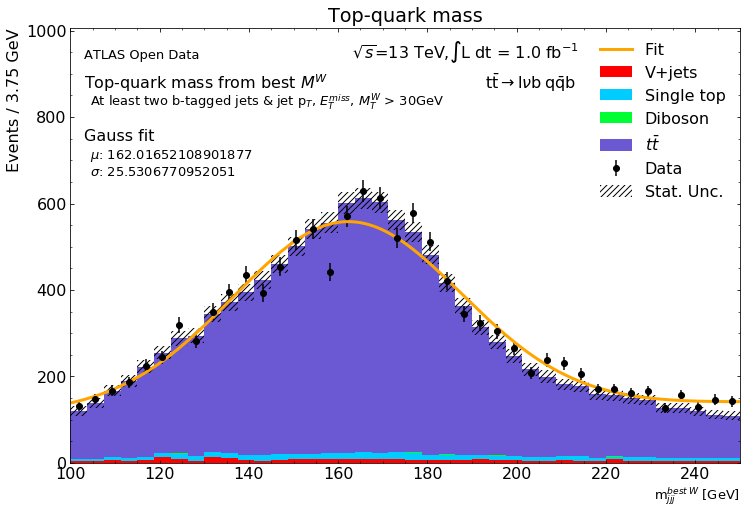

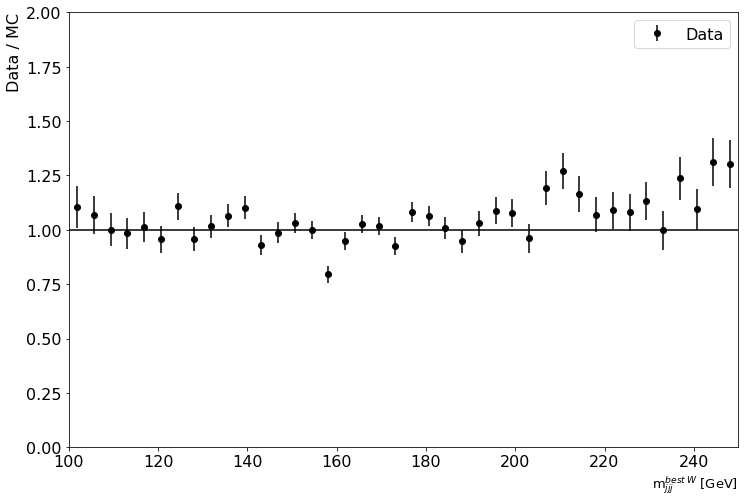

In [76]:
descr = 'Top-quark mass from best $M^W$'
title = 'Top-quark mass'
xlabel = 'm$_{jjj}^{best\:W}$ [GeV]'
step_size = 3.75#4#5
xmin = 100
xmax = 250
plot_data_query(data, '@ALL', 'W_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, p_title = title)
plt.savefig('tquark_W'+fig_ver)
plt.show()
plot_data_query(data, 'b_tag == True', 'W_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = btag_cut, p_title = title)
plt.savefig('tquark_W_btag'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'W_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title)
plt.savefig('tquark_W_all_cuts'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'W_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title, fit=True)
plt.savefig('tquark_W_all_cuts_fit'+fig_ver)
plt.show()
plot_data_query(data, all_cuts, 'W_mjjj_bedste', p_xmin = xmin, p_xmax = xmax, p_step_size = step_size, p_xlabel = xlabel, desc = descr, cut_text = all_cuts_text, p_title = title, fit=True, div_plot = True)
plt.savefig('tquark_W_all_cuts_div'+fig_ver)
plt.show()